In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv('transaction_data.csv', sep = ',')
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [10]:
df.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [ ]:
#Проверьте, какие значения принимает колонка transaction . 
#Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

#Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [19]:
df_tran = df.groupby(['transaction'], as_index=False) \
    .agg({'name' : 'count'}) \
    .sort_values('name', ascending = False)

In [21]:
df_tran

,transaction,name
2,successfull,3692
0,cancelled,1619
1,error,4


<AxesSubplot:xlabel='transaction', ylabel='name'>

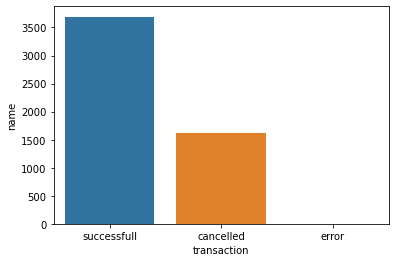

In [23]:
sns.barplot(x = df_tran.transaction, y = df_tran.name)

In [ ]:
#Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

#Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

In [28]:
client_success = df[df.transaction == 'successfull'].groupby(['name'], as_index=False) \
    .agg({'date' : 'count'}) \
    .sort_values('date', ascending = False)
client_success

,name,date
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


In [27]:
client_success.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


<AxesSubplot:xlabel='date', ylabel='Density'>

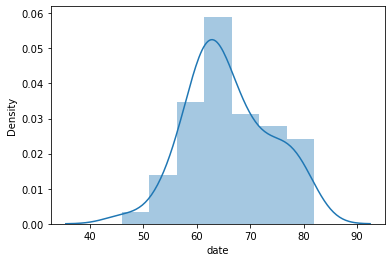

In [31]:
sns.distplot(client_success.date)

In [ ]:
#К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

#столбцы – имена пользователей
#строки – минута времени осуществления операции (minute)
#значения – число совершённых операций
#Пропущенные значения заполните нулями.

#Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

#Новые данные сохранены в df.

In [36]:
df_new = pd.read_csv('transaction_data_updated.csv', sep = ',')
df_new

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [39]:
user_vs_minute_pivot = df_new.groupby(['name','minute'], as_index = False) \
    .agg({'transaction' : 'count' }) \
    .pivot(index = 'minute', columns = 'name', values = 'transaction') \
    .fillna(0)

In [41]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [46]:
df_new['date'] = pd.to_datetime(df_new['date'])

In [47]:
df_new = df_new.assign(true_minute = df_new.date.dt.minute + df_new.date.dt.hour * 60)

C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='true_minute', ylabel='Density'>

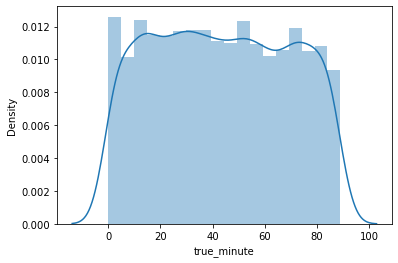

In [49]:
sns.barplot(x = df_new.transaction, y = df_new.name)

In [52]:
def id_plus(s):
    if (s.startswith('id') == False):
        return 'id'+ s
    else:
        return s

In [53]:
stringa = ['id4651830','7646509', 'id5764122']
for i in stringa:
    print(id_plus(str(i)))

id4651830
id7646509
id5764122
